<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 6: k-Nearest Neighbors (k-NN) and Dimensionality Reduction**

### In this notebook, we will cover:

- Understand the k-Nearest Neighbors (k-NN) algorithm and its challenges in high-dimensional spaces.
- Understand why dimensionality reduction is important.
- Feature Selection and Feature Extraction.
- Implement PCA (Principal Component Analysis) for unsupervised learning.
- Apply LDA (Linear Discriminant Analysis) for supervised feature extraction.
- Use t-SNE and UMAP for visualization.
- Hyperparameter Optimization in Dimensionality Reduction.

# k-Nearest Neighbors (k-NN) - A Lazy Learning Algorithm

## Overview
k-Nearest Neighbors (k-NN) is a simple yet powerful supervised learning algorithm used for classification and regression. Unlike models such as Decision Trees or Neural Networks, k-NN is a **lazy learner**, meaning it does not build an explicit model during training. Instead, it memorizes the training data and classifies new data points based on their similarity to stored instances.

## How k-NN Works
1. Choose a value of k (number of neighbors).
2. Calculate the distance between the new data point and all training points (e.g., Euclidean distance).
3. Find the k closest neighbors to the new data point.
4. For Classification: Assign the most common label among the neighbors.
5. For Regression: Compute the average (or weighted average) of the neighbors' values.

## Distance Metrics
k-NN typically uses Euclidean distance, but other distance metrics can be used:
- **Euclidean Distance** (default, for continuous data):  
  $ d(A, B) = \sqrt{\sum (A_i - B_i)^2} $
- **Manhattan Distance** (useful for grid-based data like city maps):  
  $ d(A, B) = \sum |A_i - B_i| $
- **Hamming Distance** (for categorical data):  
  Counts the number of positions at which the values differ.

## Choosing the Best k
- A small k (e.g., k=1 or k=3) leads to a more flexible model that can be sensitive to noise (**overfitting**).
- A large k (e.g., k=15 or k=20) results in a smoother decision boundary but can **underfit**.
- Odd k values are preferred to avoid ties in classification problems. Using an odd value for k ensures that one class will always have more votes, making classification decisions more straightforward.

## Implementing k-NN in Python
Let's use scikit-learn to implement k-NN for classification on the famous Iris dataset.




Accuracy: 1.00


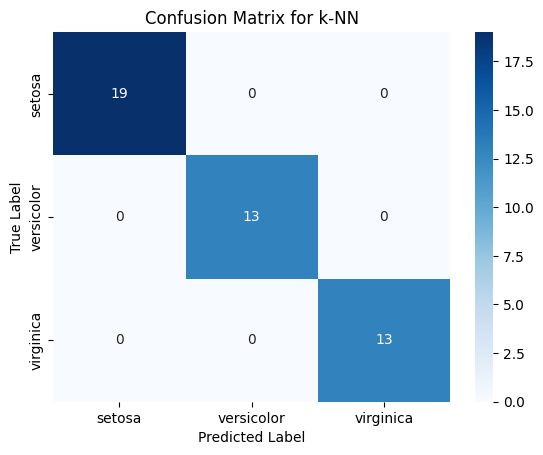

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train k-NN model (choosing k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for k-NN")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

## Advantages of k-NN
- Simple and intuitive
- No training phase (good for small datasets)  
- Works well for multi-class problems
- Can handle complex decision boundaries

## Disadvantages of k-NN
- Computationally expensive for large datasets (distance calculation for all points)  
- Sensitive to irrelevant features and scale differences (why standardization helps)  
- Struggles with imbalanced datasets

## Comparing k-NN with Other Algorithms
| Algorithm      | Training Time | Performance on Large Data | Handles Non-Linearity | Interpretability |
|---------------|--------------|---------------------------|----------------------|------------------|
| **k-NN**       | Fast (lazy learning) | Slow (distance-based) | ✅ Yes | ✅ Easy to understand |
| **Decision Tree** | Fast | ✅ Efficient | ✅ Yes | ✅ Highly interpretable |
| **SVM**        | Medium | Medium | ✅ Yes | ❌ Less interpretable |
| **Logistic Regression** | Fast | ✅ Efficient | ❌ No | ✅ Easy to understand |

## When to Use k-NN?
- When you don’t need to train a complex model (lazy learning).
- When the dataset is small to medium-sized.
- When you want an interpretable and non-parametric approach.
- When feature scaling is properly handled (distance-based models require scaling).

## Challenges in High-Dimensional Spaces
#### **1. Curse of Dimensionality**
As the number of dimensions increases, distance metrics (e.g., Euclidean distance) become less effective because:
- Distances become nearly uniform: In high-dimensional spaces, all points tend to be equidistant from each other, making nearest neighbors less meaningful.
- Increased computational cost: More dimensions mean more calculations, making k-NN slow for large datasets.

#### **2. Feature Redundancy and Noise**
- Many features may be irrelevant or redundant, affecting distance-based models like k-NN.
- High-dimensional data often includes noisy or weakly relevant features that distort distance calculations.

### **Exploring the Curse of Dimensionality**
Let's simulate how distances behave in increasing dimensions:



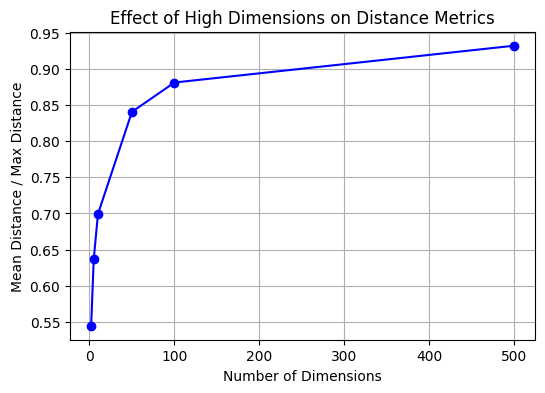

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points in different dimensions
dimensions = [2, 5, 10, 50, 100, 500]
num_samples = 1000
mean_ratios = []

for d in dimensions:
    points = np.random.rand(num_samples, d)
    pairwise_distances = np.linalg.norm(points - points.mean(axis=0), axis=1)
    mean_distance = np.mean(pairwise_distances)
    max_distance = np.max(pairwise_distances)
    mean_ratios.append(mean_distance / max_distance)

# Plot results
plt.figure(figsize=(6, 4))
plt.plot(dimensions, mean_ratios, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Dimensions")
plt.ylabel("Mean Distance / Max Distance")
plt.title("Effect of High Dimensions on Distance Metrics")
plt.grid()
plt.show()


### Interpretation:

As dimensions increase, the ratio of mean distance to max distance approaches 1, meaning points become almost equidistant, making nearest-neighbor approaches less effective.

### Implementing k-NN for Classification in High-Dimensional Data
We will now apply k-NN to the **Digits dataset**, first using the full feature set and then applying dimensionality reduction to see how it affects performance.

**Digits dataset:** The digits dataset contains 1,797 handwritten digit images (0-9), each represented by 64 features (8x8 pixel values).


Accuracy (High-Dimensional Data): 0.97


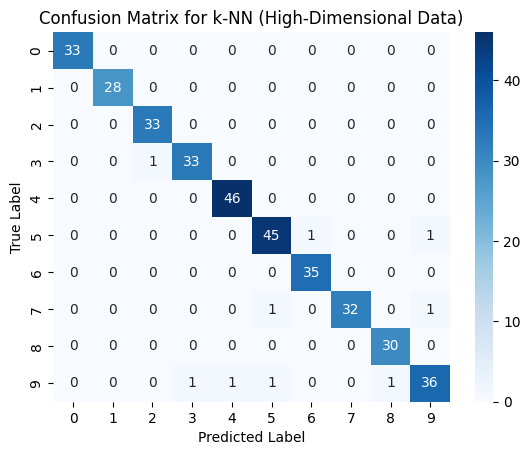

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [ ]:
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (High-Dimensional Data): {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for k-NN (High-Dimensional Data)")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

## Next Steps: Dimensionality Reduction and k-NN Performance
Now that we've seen how k-NN performs in high-dimensional space, we will apply dimensionality reduction techniques (PCA, LDA, t-SNE) to:
- Reduce feature space and mitigate the curse of dimensionality.
- Compare k-NN accuracy before and after dimensionality reduction.



Explained Variance Ratio (Keeping 10 components): 0.59
Accuracy (After Dimensionality Reduction with 10 components): 0.95


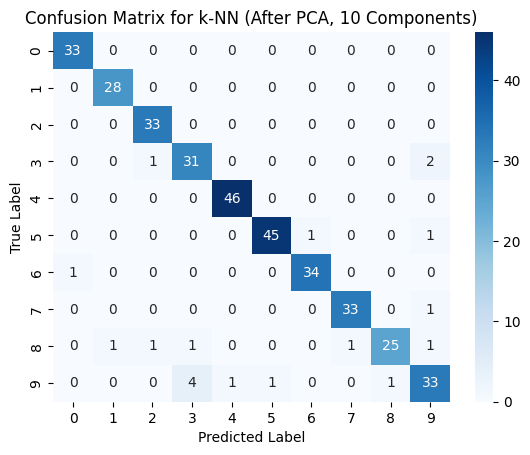

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       0.94      1.00      0.97        33
           3       0.86      0.91      0.89        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.96      0.83      0.89        30
           9       0.87      0.82      0.85        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with fewer components to ensure dimensionality reduction has an effect
pca = PCA(n_components=10)  # Reduce dimensions significantly
X_reduced = pca.fit_transform(X_scaled)

# Check explained variance to see how much information we retain
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance Ratio (Keeping {pca.n_components} components): {explained_variance:.2f}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train k-NN model on reduced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (After Dimensionality Reduction with {pca.n_components} components): {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for k-NN (After PCA, {pca.n_components} Components)")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


Applying PCA with 10 components reduced the dataset’s dimensionality significantly, preserving 59% of the original variance, yet k-NN’s accuracy only dropped slightly from 97% to 95%. This indicates that many of the original 64 features were redundant, and the most important information was retained within the first 10 principal components. The small decrease in accuracy suggests that high-dimensionality was not a major issue for k-NN, meaning the model was already performing well without PCA. However, using PCA likely improves computational efficiency, making k-NN faster while requiring less memory. If the goal is to maximize accuracy, keeping the original features might be preferable, but if efficiency is a concern, PCA still offers a strong balance between performance and reduced complexity. Further tuning, such as using 15 or 20 components, could help recover some lost accuracy while maintaining the benefits of dimensionality reduction.

**Feature:** A feature is an original characteristic of the data. It’s like a piece of raw information we use for learning.

Example: In an image of a handwritten digit, each pixel’s brightness is a feature. In a dataset about students, features could be age, test scores, and study hours.

**Component:** A component is a new representation of the data, created by combining multiple features in a smart way to capture important patterns with fewer variables.

Example: Instead of using all pixels separately, PCA (Principal Component Analysis) finds the most important patterns in the image and creates fewer but more meaningful components.

**Easy Analogy:**

Think of features as individual ingredients (flour, sugar, eggs, milk 🍪). A component is like a blended smoothie 🥤—it still contains all the important flavors, but in a more compact form!

## k in k-NN and k in k-Means

Although both k-Nearest Neighbors (k-NN) and k-Means clustering use the letter "k", they represent fundamentally different concepts in machine learning. In k-NN, "k" refers to the number of nearest neighbors considered when classifying a new data point, meaning the algorithm assigns a label based on a majority vote from its closest neighbors. In contrast, in k-Means clustering, "k" represents the number of clusters the algorithm divides the dataset into, aiming to find k centroids that best group similar data points together. While k-NN is a supervised learning algorithm that requires labeled data to classify new examples, k-Means is an unsupervised learning technique that discovers patterns and groupings within unlabeled data. Despite sharing the same notation, their purposes and applications are distinct: k-NN is used for classification and regression, whereas k-Means is primarily used for clustering and pattern discovery.

## Why Reduce Dimensionality?

In machine learning and data analysis, working with high-dimensional data can pose several challenges. Dimensionality reduction techniques help address these challenges, making models more efficient and interpretable. Below are key reasons why reducing dimensionality is essential:

**1. Curse of Dimensionality**

- As the number of dimensions (features) in a dataset increases, the volume of the feature space grows exponentially. This leads to several problems:
  - Sparsity: Data points become more spread out, making it difficult for models to find meaningful patterns.
  - Overfitting: With too many features, models may learn noise rather than generalizable patterns, leading to poor generalization on unseen data.
  - Increased Complexity: Many machine learning algorithms, such as k-nearest neighbors (k-NN) and clustering methods, rely on distance metrics (e.g., Euclidean distance), which become less meaningful in high-dimensional spaces.

- Example: Consider a dataset with 2D points. The nearest neighbor of a point is likely very close. However, in a 100-dimensional space, all points may appear nearly equidistant, making distance-based methods ineffective.

**2. Improved Visualization**

- Humans can only perceive up to three dimensions effectively, making it crucial to reduce high-dimensional data for visualization.
- Dimensionality reduction techniques allow us to project data into two or three dimensions while preserving important relationships between data points.
- Example: Suppose we have a dataset of handwritten digits (e.g., MNIST) with 784 features (28x28 pixel images). Using t-SNE or PCA, we can reduce this data to 2D or 3D to visualize how different digits cluster together.

**3. Faster Computation**

- Many machine learning algorithms, such as support vector machines (SVM), neural networks, and k-means clustering, require matrix operations that scale poorly with high dimensions.
- Reducing dimensions speeds up these computations, making training and inference more efficient.
- Example: In image processing, reducing the number of pixel features via PCA before applying a classifier can significantly speed up the training process.

**4. Better Model Performance**

- High-dimensional data often contains redundant or irrelevant features that introduce noise, making learning harder for machine learning models.
- Dimensionality reduction techniques, such as feature selection or extraction, help remove unimportant information, leading to better generalization and model performance.
- Example: In a medical diagnosis dataset with hundreds of patient attributes, some features may be correlated (e.g., weight and BMI). Removing redundant features can improve classification accuracy.


## Types of Dimensionality Reduction
Dimensionality reduction can be achieved in two primary ways: **Feature Selection** and **Feature Extraction**.

### 1. Feature Selection
Feature selection involves choosing a subset of the most relevant features from the original dataset without transforming them. The selected features retain their original meanings.

#### Methods of Feature Selection:

**Filter Methods (Statistical techniques)**
- Uses correlation or statistical tests to rank features based on relevance.
- **Examples**: Pearson correlation, Mutual Information, Chi-Square test.
- **Example**: In a dataset for predicting house prices, we may select "square footage," "number of bedrooms," and "location score" while discarding redundant features like "total floor area" (which may be highly correlated with square footage).

**Wrapper Methods (Model-based selection)**
- Evaluates feature subsets by training a model and selecting the best-performing ones.
- **Examples**: Recursive Feature Elimination (RFE), Forward Selection, Backward Elimination.
- **Example**: Using RFE with a decision tree classifier to iteratively remove the least important features.

**Embedded Methods (Feature selection during training)**
- Feature selection is built into the learning algorithm.
- **Examples**: LASSO (L1 regularization), Tree-based methods (e.g., feature importance in Random Forests).
- **Example**: LASSO regression automatically removes less important features by setting their coefficients to zero.






## Feature Selection: Wrapper Methods (Model-based Selection)

Wrapper methods evaluate feature subsets by training a model and selecting the best-performing ones. These methods iteratively assess different feature combinations and determine which subset optimizes model performance.

### Recursive Feature Elimination (RFE)
RFE is an iterative feature selection method that fits a model, ranks features by importance, and removes the least important ones until the desired number of features remains.

#### How RFE Selects Features?
1. **Model-Based Ranking**: RFE starts with all features and fits a model (e.g., Decision Tree, Logistic Regression, or SVM).
2. **Feature Importance Evaluation**: After training, the model assigns importance scores to each feature. These scores are often derived from:
   - **Coefficient Magnitudes** (for linear models like Logistic Regression or SVM).
   - **Gini Importance or Information Gain** (for Decision Trees and Random Forests).
3. **Feature Elimination**: The least important feature(s) are removed iteratively.
4. **Repeat Until Target Number of Features**: The process continues until the desired number of features is retained.




In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
model = DecisionTreeClassifier()

# Train model on all features
model.fit(X_train, y_train)
y_pred_full = model.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Model Accuracy before RFE: {accuracy_full:.2f}")

# Apply RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train model on selected features
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Model Accuracy after RFE: {accuracy_rfe:.2f}")

# Print selected features
print("Selected Features:", rfe.support_)

Model Accuracy before RFE: 0.89
Model Accuracy after RFE: 0.88
Selected Features: [ True  True  True False False  True False False  True False]


Before applying Recursive Feature Elimination (RFE), the Decision Tree classifier achieved an accuracy of 0.89 using all 10 features. After reducing the feature set to 5 selected features, the accuracy slightly decreased to 0.88, indicating that the removed features had minimal impact on model performance. The selected features correspond to positions 1, 2, 3, 6, and 9, while features 4, 5, 7, 8, and 10 were eliminated. Since the accuracy only dropped by 0.01, this suggests that the discarded features were largely redundant or uninformative, and the model can achieve nearly the same performance with half the number of features. This demonstrates how feature selection helps simplify models, reducing computational cost while maintaining strong predictive ability. However, if further optimization is desired, experimenting with a slightly larger feature subset (e.g., selecting 6 or 7 features instead of 5) might help recover the small accuracy loss.

In addition to Recursive Feature Elimination (RFE), two other common wrapper methods for feature selection are Forward Selection and Backward Elimination. While RFE iteratively removes the least important features based on a model's ranking, Forward Selection starts with an empty feature set and adds the most predictive features one by one, evaluating performance at each step. Conversely, Backward Elimination begins with all features and removes the least significant ones until performance stabilizes. Despite these differences in approach, all three methods aim to identify the most relevant subset of features by evaluating model performance, helping to improve efficiency and reduce overfitting. The choice of method depends on the dataset size, computational resources, and the complexity of interactions between features.

## Recursive Feature Elimination (RFE) with Real-World Data
RFE is an iterative feature selection method that ranks features based on model importance and removes the least significant ones.

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a real-world dataset (Breast Cancer dataset from sklearn)
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model on all features
model.fit(X_train, y_train)
y_pred_full = model.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Model Accuracy before RFE: {accuracy_full:.2f}")

# Apply RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train model on selected features
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Model Accuracy after RFE: {accuracy_rfe:.2f}")

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

Model Accuracy before RFE: 0.96
Model Accuracy after RFE: 0.96
Selected Features: ['mean texture', 'mean perimeter', 'mean concavity', 'mean concave points', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


## Original vs. Selected Features

The dataset originally contained **30 features** before applying Recursive Feature Elimination (RFE). These features represented various attributes of cell nuclei in breast cancer diagnosis.

After applying RFE with a **Random Forest Classifier**, the feature set was reduced to **10 selected features** based on their importance rankings. This process helped retain the most relevant features while eliminating less significant ones, improving model efficiency and interpretability.

### **Original Number of Features:** 30
### **Selected Number of Features After RFE:** 10

### **Selected Features:**
- Mean Texture
- Mean Perimeter
- Mean Concavity
- Mean Concave Points
- Worst Radius
- Worst Texture
- Worst Perimeter
- Worst Area
- Worst Concavity
- Worst Concave Points

This feature selection method allows for dimensionality reduction, improving model performance by focusing on the most influential features in classification while discarding redundant or less informative ones.


## Relationship Between RFE and Classifiers

Recursive Feature Elimination (RFE) is a model-agnostic feature selection technique that works by recursively removing the least important features and retraining the model until a predefined number of features remain. The effectiveness of RFE depends on the classifier it uses to evaluate feature importance. When paired with **RandomForestClassifier**, RFE leverages the model's ability to rank features based on impurity reduction (e.g., Gini importance), making it robust to noise and capable of handling non-linear relationships. Similarly, when used with **LogisticRegression**, RFE selects features based on the absolute magnitude of model coefficients, making it suitable for linear problems where interpretability is key. With **Support Vector Machines (SVMs)**, RFE uses the weights of the support vectors to determine feature importance, which works well for high-dimensional classification tasks. Decision trees, when used as the base model, evaluate feature importance based on information gain or Gini index, making them effective for feature selection in hierarchical, rule-based decision systems. The choice of classifier in RFE significantly impacts the selected feature subset, as different models weigh feature importance differently. Thus, selecting the right classifier for RFE depends on the data characteristics, the complexity of relationships between features, and the ultimate goal of the feature selection process.


### 2. Feature Extraction
Feature extraction transforms existing features into a new set of lower-dimensional features. Unlike feature selection, this method **creates new features** that best represent the data while preserving its structure.

#### Methods of Feature Extraction:

**Principal Component Analysis (PCA)**
- Converts correlated features into a set of uncorrelated variables called principal components.
- Reduces dimensionality while preserving the variance of the data.
- **Example**: In an image dataset with thousands of pixel values, PCA can reduce the number of features while keeping most of the visual information.

**Linear Discriminant Analysis (LDA)**
- A supervised technique that maximizes the separation between classes by projecting data onto a lower-dimensional space.
- **Example**: In a dataset for classifying different types of flowers, LDA helps in reducing dimensions while improving class separability.

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**
- A non-linear technique for visualizing high-dimensional data in 2D or 3D.
- **Example**: Visualizing clusters in a dataset of handwritten digits.

**Autoencoders (Neural Networks for Feature Extraction)**
- Unsupervised deep learning models that compress data into a lower-dimensional representation.
- **Example**: Compressing high-resolution images while keeping key details.

# Principal Component Analysis (PCA)

PCA is an **unsupervised** technique that finds new **axes (components)** where data has the most variance.

Variance measures how much the values in a dataset deviate from the mean. A high variance means the data points are widely spread out, showing significant differences, while a low variance indicates that the data points are closely packed together and similar.

- If a dataset has high variance, it contains a lot of differences among its values.
- If a dataset has low variance, the values are more similar to each other.

### 🔹 **Key Ideas Behind PCA**
- Finds the **directions** (principal components) that explain the most variance in the data.
- Projects data onto these new **orthogonal axes**.
- Reduces redundancy in features.
- Helps in **dimensionality reduction** while preserving as much information as possible.
- Can be used for **feature extraction** and **data visualization**.

### 🧮 **Mathematical Explanation**

#### **1️⃣ Standardize the Data**  
Since PCA is sensitive to scale, we standardize each feature by subtracting the mean and dividing by the standard deviation:
$$ X_{standardized} = \frac{X - \mu}{\sigma} $$
where:
- **$X$** is the original feature matrix.
- **$\mu$** is the mean of each feature.
- **$\sigma$** is the standard deviation of each feature.

#### **2️⃣ Compute the Covariance Matrix**  
The covariance matrix captures the relationships between different features:
$$ C = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X}) (X_i - \bar{X})^T $$
where:
- **$X$** is the data matrix.
- **$n$** is the number of samples.
- **$C$** is the covariance matrix, which describes how different features vary together.

**Covariance vs. Correlation:** Covariance is scale-dependent: It changes with the magnitude of the variables.
Correlation is the normalized version of covariance, giving a value between -1 and 1, making it easier to compare across datasets.

#### **3️⃣ Compute Eigenvalues & Eigenvectors**  
- **Eigenvalues** represent the amount of variance captured by each principal component.
- **Eigenvectors** define the directions of these new principal components.
- Solve the equation:
$$ C v = \lambda v $$
where:
- **$C$** is the covariance matrix.
- **$v$** represents the eigenvectors (principal components).
- **$\lambda$** represents the eigenvalues (variance explained by each component).

#### **4️⃣ Select Top K Components**  
- Sort eigenvalues in descending order.
- Choose the top **$K$** components that explain the most variance.
- Variance Explained Ratio:
  $$ \text{Explained Variance} = \frac{\lambda_k}{\sum \lambda} $$
  This helps decide how many components to retain.

#### **5️⃣ Project Data onto the New Axes**  
- Transform the original dataset into a new subspace using the selected components:
  $$ X' = X V_k $$
  where:
  - **$X$** is the original dataset.
  - **$V_k$** contains the top **$K$** eigenvectors.
  - **$X'$** is the transformed dataset with reduced dimensions.

### **Key Advantages of PCA**
- Reduces dimensionality while retaining most information.  
- Removes redundant features by transforming data into uncorrelated components.  
- Speeds up machine learning algorithms by reducing the number of features.  
- Improves visualization of high-dimensional data in 2D or 3D.  

### **Limitations of PCA**
- Loss of Interpretability: The new features (principal components) are linear combinations of the original features, making them harder to interpret.  
- Assumes Linearity: PCA works best for datasets where features have linear relationships.  
- Sensitive to Scaling: PCA requires feature standardization to perform well.



### 🏆 **Example: Applying PCA in Python**


PCA is a powerful technique for reducing dimensionality while keeping the most important information. It is widely used in data analysis, visualization, and preprocessing before machine learning models.

In [ ]:
# Load and Preprocess the Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset (Digits dataset)
digits = load_digits()
X, y = digits.data, digits.target  # Features and labels

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Checking the shape before reduction
print(f"Original Data Shape: {X.shape}")  # (1797, 64)



Original Data Shape: (1797, 64)


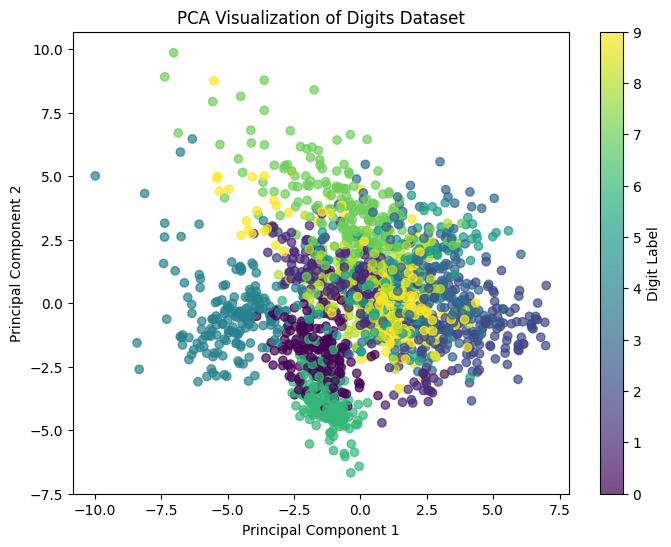

Explained Variance Ratio: [0.12033916 0.09561054]
Total Variance Explained: 0.22
🔹 PCA Accuracy: 53.61%


In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Visualizing PCA-Reduced Data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Digits Dataset")
plt.show()

# Explained Variance Ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2f}")

# Performance Evaluation for PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
clf_pca = LogisticRegression(max_iter=10000, random_state=42).fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)
print(f"🔹 PCA Accuracy: {pca_accuracy:.2%}")

**Explained Variance Ratio (EVR):** EVR tells us how much information (variance) each principal component captures in Principal Component Analysis (PCA). Imagine PCA compresses your dataset into fewer dimensions while keeping as much useful information as possible. EVR shows how much of the original information is still retained in each principal component.

- Higher EVR (closer to 1) → The component preserves more of the original data's variance.
- Lower EVR (closer to 0) → The component captures very little useful information.
- Sum of EVRs (for all components) tells you how much total variance is preserved after dimensionality reduction.

# Linear Discriminant Analysis (LDA)

LDA is a **supervised** technique that **maximizes class separation** and is commonly used for classification and dimensionality reduction.

### 🔹 **How LDA Works**
- Unlike PCA (which focuses on variance), LDA finds **directions that best separate different classes**.
- Uses **class labels** to create axes that maximize the ratio of **between-class variance** to **within-class variance**.
- Projects data onto these new axes to optimize class separability.
- Typically used for **feature extraction** before classification tasks.

### 🧮 **Mathematical Explanation**

#### **1️⃣ Compute Within-Class Scatter Matrix**  
Measures how much each class varies internally:
$$ S_W = \sum_{c} \sum_{x \in c} (x - \mu_c)(x - \mu_c)^T $$
where:
- **$S_W$** is the within-class scatter matrix.
- **$x$** represents a sample point.
- **$\mu_c$** is the mean of class **$c$**.

#### **2️⃣ Compute Between-Class Scatter Matrix**  
Measures the separation between class centroids:
$$ S_B = \sum_{c} N_c (\mu_c - \mu)(\mu_c - \mu)^T $$
where:
- **$S_B$** is the between-class scatter matrix.
- **$N_c$** is the number of samples in class **$c$**.
- **$\mu_c$** is the mean of class **$c$**.
- **$\mu$** is the overall mean of all classes.

#### **3️⃣ Compute Eigenvectors and Eigenvalues**  
- Solve the **generalized eigenvalue problem**:
  $$ S_W^{-1} S_B v = \lambda v $$
  where:
  - **$v$** are the eigenvectors (discriminant directions).
  - **$\lambda$** are the eigenvalues representing the amount of separation.
- The eigenvectors with the largest eigenvalues correspond to the best class-separating directions.

#### **4️⃣ Select Top K Components**  
- Sort eigenvalues in **descending order**.
- Choose the top **$K$** eigenvectors to retain the most discriminative features.
- Construct a **transformation matrix** with these eigenvectors.

#### **5️⃣ Project Data onto the New Axes**  
Transform the original dataset using the selected discriminant axes:
$$ X' = X V_k $$
where:
- **$X$** is the original dataset.
- **$V_k$** contains the top **$K$** eigenvectors.
- **$X'$** is the transformed dataset in the new reduced feature space.


### **Key Advantages of LDA**
- Improves Classification Performance by maximizing class separability.  
- Reduces Dimensionality while retaining key class-discriminating information.  
- Enhances Computational Efficiency by reducing feature space before classification.  
- Works Well with Normally Distributed Data where class separation is linear.  

### **Limitations of LDA**
- Assumes Linearly Separable Classes: LDA may not work well if classes are not linearly separable.  
- Sensitive to Outliers: Large variations within a class can affect performance.  
- Requires More than One Class: Since it depends on class labels, LDA is not applicable to unlabeled data.

### 🏆 **Example: Applying LDA in Python**


LDA is a powerful supervised technique that improves classification and reduces dimensionality while preserving class distinctions. It is widely used in fields like face recognition, bioinformatics, and medical diagnosis.



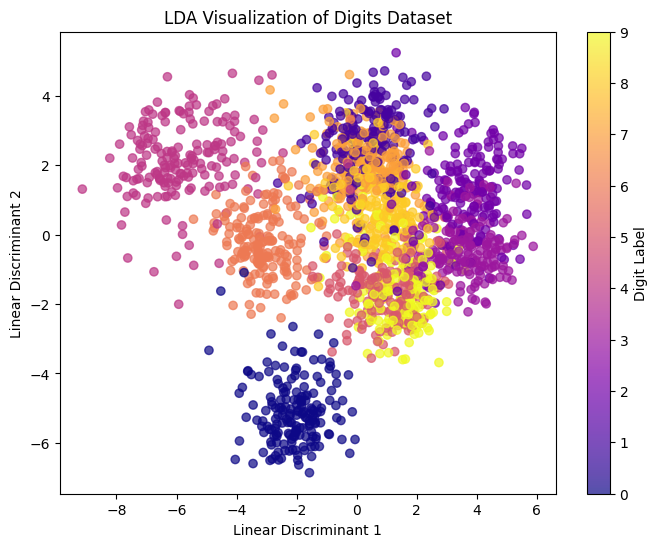

Explained Variance Ratio (LDA): [0.28912041 0.18262788]
Total Variance Explained (LDA): 0.47
🔹 LDA Accuracy: 72.22%


In [ ]:
# Apply LDA for Dimensionality Reduction (Supervised)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Visualizing LDA-Reduced Data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA Visualization of Digits Dataset")
plt.show()

# Explained Variance Ratio for LDA
print(f"Explained Variance Ratio (LDA): {lda.explained_variance_ratio_}")
print(f"Total Variance Explained (LDA): {sum(lda.explained_variance_ratio_):.2f}")

# Performance Evaluation for LDA
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)
clf_lda = LogisticRegression(max_iter=10000, random_state=42).fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
lda_accuracy = accuracy_score(y_test, y_pred_lda)
print(f"🔹 LDA Accuracy: {lda_accuracy:.2%}")


# t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a **non-linear** dimensionality reduction technique **mainly used for visualization** of high-dimensional data in 2D or 3D.

### 🔹 **How t-SNE Works**
- Unlike PCA & LDA, t-SNE **preserves local structures** instead of global variance.
- Uses **probability distributions** to ensure that similar points in high-dimensional space stay close together in the lower-dimensional representation.
- It is widely used in exploratory data analysis, particularly for clustering and pattern recognition.

### 🧮 **Mathematical Explanation**

#### **1️⃣ Compute Pairwise Similarities in High Dimensions**  
- For each point **$x_i$**, compute the probability that another point **$x_j$** is its neighbor:
  $$ p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)} $$
- This probability is based on a Gaussian distribution centered at **$x_i$**, where **$\sigma_i$** controls the spread.
- The final joint probability distribution in high-dimensional space is:
  $$ p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n} $$

#### **2️⃣ Compute Pairwise Similarities in Low Dimensions**  
- In the lower-dimensional space, similarities are computed using a **t-distribution** (Student's t-distribution with 1 degree of freedom):
  $$ q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}} $$
- The heavy-tailed **t-distribution** helps avoid the **crowding problem**, where points collapse in low-dimensional space.

#### **3️⃣ Minimize the KL Divergence Between High & Low Dimensional Distributions**  
- The goal is to make **$q_{ij}$** (low-dimensional similarities) as close as possible to **$p_{ij}$** (high-dimensional similarities) by minimizing **Kullback-Leibler (KL) divergence**:
  $$ KL(P||Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}} $$
  - **$P$**: High-dimensional similarities.
  - **$Q$**: Low-dimensional similarities.
  - KL Divergence measures how different the two distributions are.

#### **4️⃣ Gradient Descent Optimization**  
- Updates low-dimensional embeddings **$y_i$** iteratively to **minimize KL divergence**.
- Uses the gradient:
  $$ \frac{\delta C}{\delta y_i} = 4 \sum_{j} (p_{ij} - q_{ij}) (y_i - y_j) (1 + ||y_i - y_j||^2)^{-1} $$
- This ensures that similar points in the high-dimensional space remain close together in the low-dimensional representation.

### **Key Advantages of t-SNE**
- Great for Visualization: Projects complex high-dimensional data into 2D/3D while preserving local clusters.  
- Captures Non-Linear Relationships: Unlike PCA, it can reveal patterns and structures that are not linearly separable.  
- Effective for Clustering: Naturally groups similar data points, making it useful for pattern recognition.

### **Limitations of t-SNE**
- Computationally Expensive: Not suitable for very large datasets due to slow convergence.  
- Does Not Preserve Global Structure: Focuses on local similarities, which may distort overall relationships.  
- Stochastic Results: Different runs may yield different visualizations due to randomness in initialization.


### 🏆 **Example: Applying t-SNE in Python**

t-SNE is an excellent tool for visualizing high-dimensional data and is widely used in exploratory data analysis.



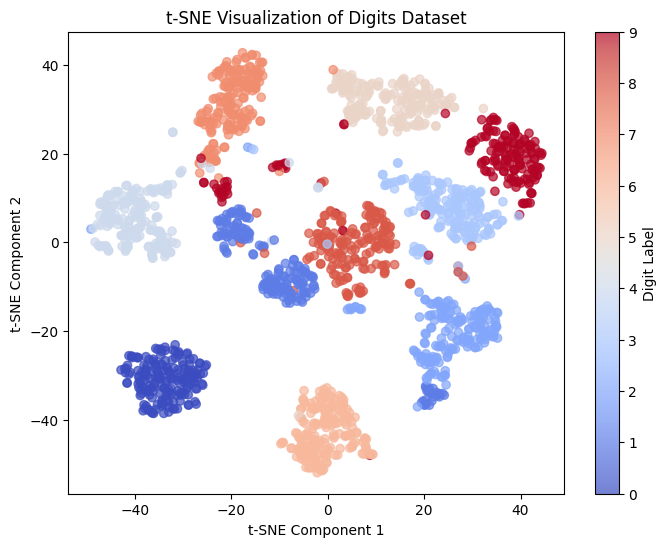

In [ ]:
# Apply t-SNE for Non-Linear Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizing t-SNE-Reduced Data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Digits Dataset")
plt.show()


t-SNE is a visualization tool, not a dimensionality reduction method for modeling like PCA or LDA. Unlike PCA, which preserves global variance, or LDA, which maximizes class separability, t-SNE focuses only on local neighborhood relationships. This means that distances in t-SNE space are distorted and do not accurately represent real-world similarities. Since t-SNE is non-deterministic (producing different results each time), accuracy scores and explained variance ratios would be misleading and unreliable. Instead, t-SNE should be evaluated visually, looking for meaningful cluster formations rather than relying on numerical metrics like accuracy or variance. If we need a quantitative measure, alternatives like UMAP or Silhouette Score are better suited.

# 📊 Comparing PCA, LDA, and t-SNE

| Method  | Type | Best For | Limitations |
|---------|------|----------|------------|
| **PCA** | Unsupervised | Reducing dimensions while keeping variance | Assumes linear relationships |
| **LDA** | Supervised | Maximizing class separation | Needs class labels |
| **t-SNE** | Non-Linear | Visualization of complex data | Computationally expensive |

### **Key Takeaways**
- **PCA** captures the most important **variances** in the dataset.  
- **LDA** finds the best **discriminative features** for classification.  
- **t-SNE** is best for **visualizing clusters** but not for feature reduction.  


### **When to Use Each Method?**
- **PCA** → Use when you want **unsupervised** dimensionality reduction.
- **LDA** → Use when you have **labels** and need to improve classification.
- **t-SNE** → Use when you want **visualization** of high-dimensional data.


# **Hyperparameter Optimization in Dimensionality Reduction**

Dimensionality reduction techniques such as **PCA**, **LDA**, and **t-SNE** have important hyperparameters that significantly impact their performance. Below, we explore key hyperparameters for each method and discuss how to tune them effectively.


## Principal Component Analysis (PCA) - Hyperparameters
PCA is an unsupervised linear transformation that projects data onto principal components (axes of maximum variance).

### 🔹 **Key Hyperparameters**
- **`n_components`** ($k$): The number of principal components (PCs) to retain.
  - **Choosing the right value**: Set `n_components` based on explained variance:
    $$
    \sum_{i=1}^{k} \lambda_i \Big/ \sum_{i=1}^{N} \lambda_i
    $$
    where **$\lambda_i$** is the eigenvalue of the covariance matrix.
  - **Rule of thumb**: Choose $k$ such that 95%-99% of variance is retained.
  - **Auto-selection**: `n_components='mle'` selects the optimal number automatically.

### ✅ **Hyperparameter Tuning**
- Use the Scree Plot (Elbow Method) to choose `n_components`.
- Use `pca.explained_variance_ratio_` to determine variance retained.
- For visualization, set `n_components` lower (e.g., 2-5).


## Linear Discriminant Analysis (LDA) - Hyperparameters
LDA is a supervised linear method that finds the best axis for class separation.

### 🔹 **Key Hyperparameters**
- **`n_components`**: The number of linear discriminants to retain.
  - **Formula**:
    $$
    n_{components} = \min(n_{classes} - 1, n_{features})
    $$
  - **Why this limit?** LDA reduces features up to `n_classes - 1`, since it is based on class separation.

- **`solver`**: Optimization solver for computing LDA.
  - `"svd"`: Default (no need to compute covariance, works well for large datasets).
  - `"eigen"` and `"lsqr"`: Used when the covariance matrix is invertible.

### ✅ **Hyperparameter Tuning**
- Use `n_components = n_classes - 1` to preserve all discriminative power.
- For large datasets, use `"svd"` solver for efficiency.
- For small, well-conditioned datasets, try `"eigen"` solver for better precision.


## t-Distributed Stochastic Neighbor Embedding (t-SNE) - Hyperparameters
t-SNE is a non-linear manifold learning technique that preserves local structure of high-dimensional data.

### 🔹 **Key Hyperparameters**
- **`perplexity`** ($P$): Controls how much attention is paid to local vs. global structure.
  - **Low** ($5-20$) → Focus on local patterns (small clusters).
  - **High** ($50-100$) → Focus on global structure (large-scale patterns).
  - **Formula**:
    $$
    P_{j|i} = \frac{\exp\left(- \frac{d_{ij}^2}{2\sigma_i^2} \right)}
    {\sum_{k \neq i} \exp\left(- \frac{d_{ik}^2}{2\sigma_i^2} \right)}
    $$
    where:
    - **$P_{j|i}$** = Probability that point **$j$** is a neighbor of **$i$**.
    - **$\sigma_i$** = Perplexity-based variance.

- **`learning_rate`**: Controls update step size.
  - **Too high** → Instability.
  - **Too low** → Slow convergence.
  - **Best range**: `10` to `1000`.

- **`n_iter`**: Number of optimization iterations.
  - **Recommended**: `250 - 1000`.

### ✅ **Hyperparameter Tuning**
- Try `perplexity = 30` first, then fine-tune between [5, 50].
- Set `learning_rate` high (200-1000) for large datasets, low (~10) for small datasets.
- Increase `n_iter` if embeddings don’t stabilize.



### **Final Takeaways**
| **Method** | **Key Hyperparameters** | **Tuning Strategy** |
|------------|------------------------|---------------------|
| **PCA** | `n_components` | Keep **95%-99% variance** using the **Scree Plot**. |
| **LDA** | `n_components`, `solver` | Use **`n_components = n_classes - 1`**, `svd` for large datasets. |
| **t-SNE** | `perplexity`, `learning_rate`, `n_iter` | Tune **perplexity** (`5-50`), **learning_rate** (`10-1000`), and **n_iter** (`250-1000`). |





## **Understanding the Dataset and Goal**

In this experiment, we use the **Digits Dataset** from `sklearn.datasets`, which consists of handwritten digits (0-9) represented as 64 numerical features (8x8 pixel images). The goal of the code is to apply and compare different dimensionality reduction techniques—PCA, LDA, and t-SNE—and evaluate their effectiveness for classification and visualization.

Initially, the dataset has 64 features representing pixel intensities. After applying dimensionality reduction:
- PCA reduces the feature count to 5 components, retaining most of the data variance.
- LDA reduces the feature count to 9 components, optimizing for class separability (since LDA keeps at most `n_classes - 1` features).
- t-SNE reduces the data to 2 components, primarily for visualization, without preserving a transformation that can be applied to the test set.

These reductions highlight how different methods approach dimensionality reduction: PCA focuses on variance, LDA maximizes class separation, and t-SNE helps in visualization.

🔹 PCA Accuracy: 80.0%
🔹 LDA Accuracy: 95.56%


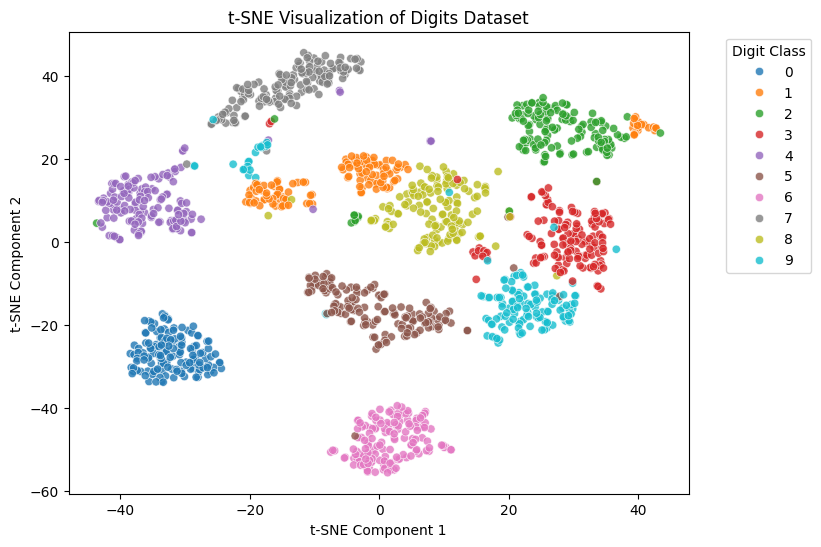

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

# Load the Digits Dataset (64 features, 10 classes)
digits = load_digits()
X, y = digits.data, digits.target  # Features and Labels

# Standardize Features (Important for PCA and LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% Training, 20% Testing, Stratified by Class)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# PCA Transformation (Reduce to 5 Principal Components)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# LDA Transformation (n_components = classes - 1 = 9)
lda = LDA(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# t-SNE is NOT suitable for classification (No direct transformation on test set)
# It is primarily for visualization; hence, we will only visualize training data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)  # No test transformation

# Train Logistic Regression Models
# Using `lbfgs` solver and increasing max iterations for better convergence
clf_pca = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train_pca, y_train)
clf_lda = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train_lda, y_train)

# Predict & Compute Accuracy
y_pred_pca = clf_pca.predict(X_test_pca)
y_pred_lda = clf_lda.predict(X_test_lda)

pca_accuracy = accuracy_score(y_test, y_pred_pca)
lda_accuracy = accuracy_score(y_test, y_pred_lda)

# Print Final Accuracy Scores
print(f"🔹 PCA Accuracy: {round(pca_accuracy * 100, 2)}%")
print(f"🔹 LDA Accuracy: {round(lda_accuracy * 100, 2)}%")

# 📊 Visualize t-SNE Results (Only on Training Set)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette="tab10", alpha=0.8)
plt.title("t-SNE Visualization of Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Digit Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## **Interpretation of Results**

The results demonstrate the effectiveness of dimensionality reduction techniques in classification and visualization:

### **1️⃣ Classification Accuracy**
- PCA achieved 80.0% accuracy, indicating that while PCA reduces dimensionality effectively, it does not optimize class separability. PCA focuses only on maximizing variance, and some discriminative features may be lost, leading to lower classification accuracy.
- LDA achieved 95.56% accuracy, significantly outperforming PCA. This is expected because LDA is specifically designed to maximize class separability by finding optimal projection axes for classification tasks.

### **2️⃣ t-SNE Visualization**
- The t-SNE plot shows clear clusters corresponding to different digit classes. This confirms that t-SNE is excellent for visualizing high-dimensional data in a lower-dimensional space while preserving local structure.
- Some minor overlaps exist between certain classes, which could indicate similarities in handwritten digits that the model might confuse.
- Unlike PCA and LDA, t-SNE is not designed for classification but provides insightful representations of data distribution.

### **Key Takeaways**
- **PCA** is useful for reducing features while maintaining overall variance but is not optimized for classification.
- **LDA** is a better choice for supervised learning tasks where class separability is crucial.
- **t-SNE** helps in exploratory data analysis by providing a meaningful representation of high-dimensional data.

These findings highlight the importance of choosing the right dimensionality reduction technique based on the task: PCA for general feature reduction, LDA for classification, and t-SNE for visualization.



# Visualize the original 64 features and the transformed PCA or LDA components

## Viewing the Original 64 Features

Since the Digits Dataset consists of 8×8 pixel images, each feature represents the intensity of a pixel. We can visualize an example digit and its corresponding 64 features.

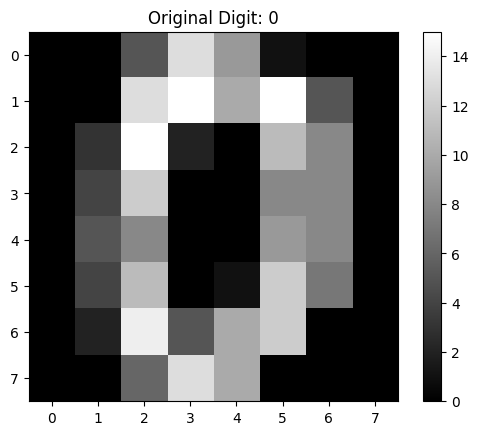

Pixel Intensities (64 features):
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load Digits dataset
digits = load_digits()

# Select a sample image (e.g., first digit)
sample_image = digits.images[0]  # 8x8 image of the first digit

# Display the original digit image
plt.imshow(sample_image, cmap='gray')
plt.colorbar()
plt.title(f"Original Digit: {digits.target[0]}")
plt.show()

# Print the raw pixel values (64 features)
print("Pixel Intensities (64 features):\n", sample_image)


🔹 Interpretation: Each of these 64 values corresponds to a grayscale pixel intensity (0-16).

**Why 0 to 16?**

The Digits dataset in sklearn contains 8×8 grayscale images where each pixel has an intensity value between 0 and 16.

- 0 → The pixel is completely white (no ink).
- 16 → The pixel is completely black (full ink).
- 1-15 → Different shades of gray in between.

**Why not 0-255 like normal images?**

Most images use 0-255 for pixel values, but in this dataset, the values are scaled down to 0-16 for simplicity and easier processing.

**Why 0 to 255? (Standard Grayscale Range)**

255 comes from binary storage:
- Digital images are stored using 8-bit values per pixel.
- An 8-bit integer can store 2⁸ = 256 values, ranging from 0 to 255.
- 0 = Black, 255 = White, and values in between are shades of gray.
- This range is used in most image formats (JPEG, PNG, etc.).

**Why 0 to 16? (Digits Dataset)**

The Digits dataset (from sklearn.datasets.load_digits) contains 8×8 grayscale images of handwritten numbers.

The pixel intensities were scaled down to 0-16 instead of 0-255 for:
- Simpler representation (easier to work with smaller numbers).
- Memory efficiency (lower precision needed for small images).
- Compatibility with older ML algorithms (which worked better with smaller ranges).

**Where Did 16 Come From?**

- 0-16 is a downscaled version of 0-255, likely using integer division (255 ÷ 16 ≈ 16 levels).
- Instead of using 256 levels of gray, the dataset compresses them into just 17 levels (0 to 16) to keep things lightweight.

**Key Takeaway:**

- 0-255 is used because of 8-bit pixel storage in standard images.
- 0-16 is a scaled-down version to make processing easier in the Digits dataset.

The 64 features in the original dataset correspond to the pixel intensities of an 8×8 grayscale image, as shown in your picture. Each pixel's intensity value (ranging from 0 to 16) represents a feature in the dataset.

However, after applying PCA or LDA, these 64 pixel values are transformed into numerical components:

- PCA converts them into 5 numerical features (principal components) that capture variance.
- LDA converts them into 9 numerical features (linear discriminants) that maximize class separation.
- t-SNE projects them into 2D for visualization but does not retain a meaningful numerical transformation for classification.

Since PCA and LDA create new transformed features, we lose the direct connection to individual pixels, making it impossible to visualize them in the same way as the original digit image.

## Viewing the PCA Components (5 Features)
PCA transforms the 64 features into 5 new features (principal components). These are not individual pixels anymore but weighted combinations of original pixels.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for better visualization
pca_features = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(5)])
print("Transformed Features (PCA Components):\n", pca_features.head())


Transformed Features (PCA Components):
         PC1       PC2       PC3       PC4       PC5
0 -1.914214 -0.954502 -3.946035 -2.028723 -0.267173
1 -0.588980  0.924636  3.924755  1.779850 -0.993430
2 -1.302039 -0.317189  3.023333  2.043376 -2.081155
3  3.020770 -0.868772 -0.801744  2.187039 -0.556813
4 -4.528949 -1.093480  0.973121  1.419510 -1.715106


🔹 Interpretation:

- The 5 PCA features are linear combinations of the 64 original features.
- They do not correspond to specific pixels but instead capture patterns in the data.

## Viewing the LDA Components (9 Features)

LDA transforms the 64 features into 9 new features (linear discriminants) that maximize class separation.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA (n_components = 9 since there are 10 classes)
lda = LDA(n_components=9)
X_lda = lda.fit_transform(X_scaled, digits.target)

# Convert to DataFrame
lda_features = pd.DataFrame(X_lda, columns=[f"LD{i+1}" for i in range(9)])
print("Transformed Features (LDA Components):\n", lda_features.head())


Transformed Features (LDA Components):
         LD1       LD2       LD3       LD4       LD5       LD6       LD7  \
0 -2.014632 -5.623486 -0.186594 -2.800109 -0.443373 -0.579755  0.109349   
1  0.220967  3.592400  2.149017 -0.114046  2.054971  2.222544  0.123115   
2  2.234855  2.709504  4.269928 -2.147419 -1.737674  1.281434 -2.512566   
3  2.760965 -0.624427  0.158751  1.247578  0.066359 -0.805282  2.963266   
4 -5.845449  1.754015  0.400295 -1.376300  0.312251  0.461142  1.367118   

        LD8       LD9  
0  0.183507  0.965495  
1  3.392106 -1.207669  
2 -1.083700  0.004225  
3  1.575261  0.020835  
4 -0.665557  0.132020  


🔹 Interpretation:

- The 9 LDA features represent projections that best separate different digit classes.
- Like PCA, these features are not individual pixels but rather mathematical transformations of the original 64 features.

**🔍 Key Takeaways**

- The original 64 features represent pixel intensities in an 8×8 image.
- PCA components (5 features) capture the directions with the highest variance, useful for compression.
- LDA components (9 features) are optimized to separate digit classes effectively.
- Neither PCA nor LDA features correspond directly to pixels but are instead combinations of multiple pixels.

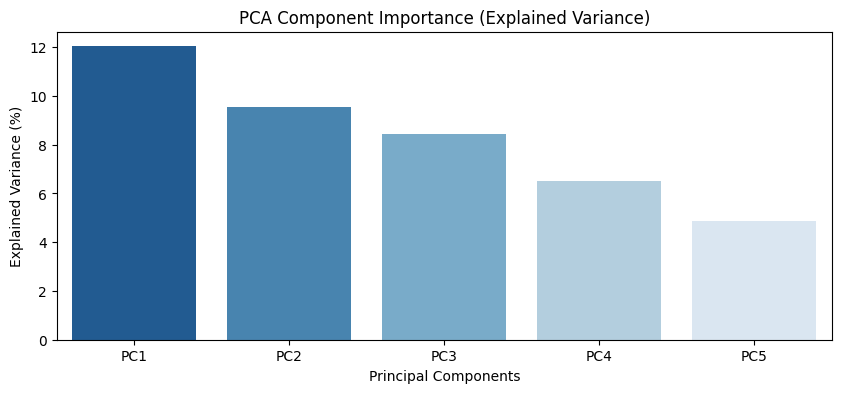

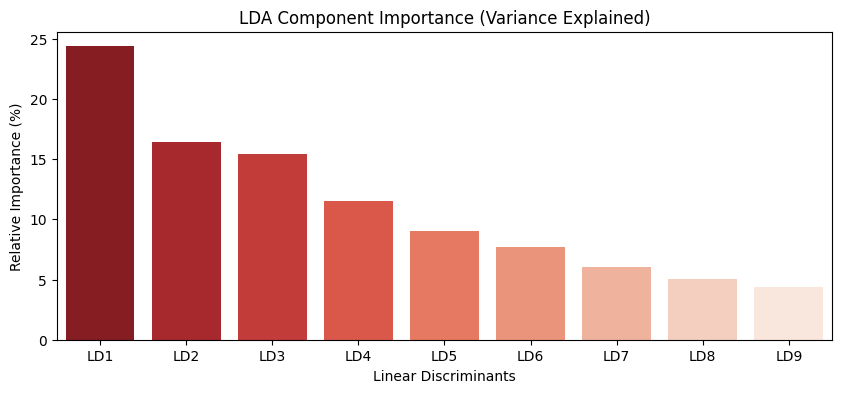

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Load Digits dataset
digits = load_digits()

# Standardize features (important for PCA and LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)
y = digits.target

# Apply PCA (reduce to 5 components)
pca = PCA(n_components=5)
pca.fit(X_scaled)

# Apply LDA (reduce to 9 components)
lda = LDA(n_components=9)
X_lda = lda.fit_transform(X_scaled, y)

# Explained variance ratio for PCA
pca_variance = pca.explained_variance_ratio_ * 100

# Compute LDA component importance (variance explained by each component)
lda_variance = np.var(X_lda, axis=0)
lda_importance = (lda_variance / np.sum(lda_variance)) * 100

# Define color themes manually to match previous look
pca_colors = sns.color_palette("Blues_r", n_colors=5)
lda_colors = sns.color_palette("Reds_r", n_colors=9)

# Convert data to Pandas DataFrame for Seaborn compatibility
pca_df = pd.DataFrame({"Component": [f"PC{i+1}" for i in range(5)], "Variance": pca_variance})
lda_df = pd.DataFrame({"Component": [f"LD{i+1}" for i in range(9)], "Variance": lda_importance})

# Plot PCA component importance with color mapping
plt.figure(figsize=(10, 4))
sns.barplot(x="Component", y="Variance", hue="Component", data=pca_df, palette=pca_colors, legend=False)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance (%)")
plt.title("PCA Component Importance (Explained Variance)")
plt.show()

# Plot LDA component importance with color mapping
plt.figure(figsize=(10, 4))
sns.barplot(x="Component", y="Variance", hue="Component", data=lda_df, palette=lda_colors, legend=False)
plt.xlabel("Linear Discriminants")
plt.ylabel("Relative Importance (%)")
plt.title("LDA Component Importance (Variance Explained)")
plt.show()

Here are the visualizations showing the importance of PCA and LDA components:

1. PCA Component Importance (Explained Variance):

- Displays how much variance each principal component (PC1 to PC5) captures.
- PC1 explains the most variance, with each subsequent component contributing less.

2. LDA Component Importance (Variance Explained):

- Shows how much each linear discriminant (LD1 to LD9) contributes to class separation.
- LD1 has the highest importance, meaning it captures the most separation between classes.

3. These plots highlight the difference:

- PCA prioritizes variance, so PC1 is the most influential.
- LDA optimizes class separation, making LD1 the most discriminative.

### Visualizing PCA Image Reconstruction & LDA Feature Representation

This code demonstrates the application of PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis)

in reducing dimensionality and visualizing feature transformations using the Digits dataset.

- PCA is used to reduce the 64 original pixel-based features into different component sizes (64, 32, 16, 8, 5, 4), and then reconstructs the images to show how much information is retained at different levels of reduction.
- LDA is applied to transform features into a 9-component space optimized for class separation, but it does not support image reconstruction.
- The reconstructed PCA images help us analyze how well the structure of digits is preserved as the dimensionality is reduced.
- LDA-transformed features are visualized as a heatmap to observe how digit representations differ across reduced feature space.

This visualization helps compare how PCA retains image structures while LDA enhances class separability.


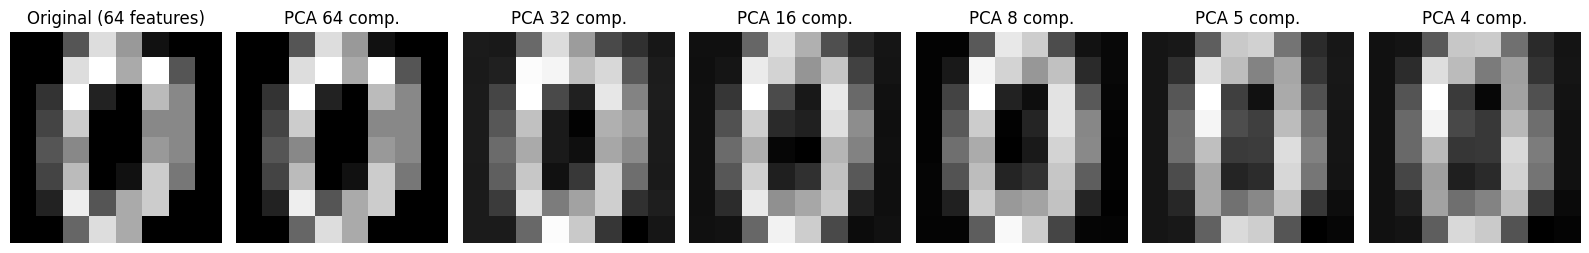

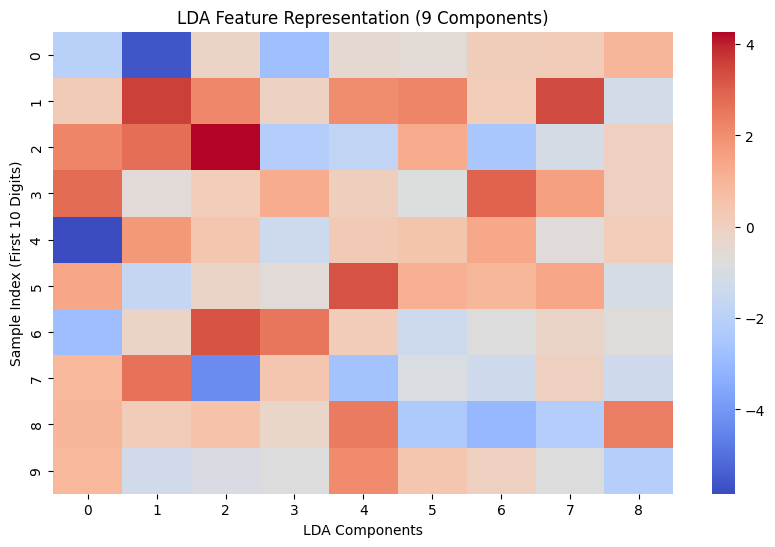

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Load Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standardize the data (PCA & LDA perform better with standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to different numbers of components (including 5)
components_list = [64, 32, 16, 8, 5, 4]  # Including 5 for special visualization
pca_models = {comp: PCA(n_components=comp).fit(X_scaled) for comp in components_list}

# Apply LDA to reduce to 9 components
lda = LDA(n_components=9)
X_lda = lda.fit_transform(X_scaled, y)  # LDA transforms data but does not allow reconstruction

# Select a sample image to reconstruct (e.g., the first digit)
sample_idx = 0
original_image = X[sample_idx].reshape(8, 8)

# Create a figure to compare different reconstructions
fig, axes = plt.subplots(1, len(components_list) + 1, figsize=(16, 4))

# Plot the original image
axes[0].imshow(original_image, cmap="gray")
axes[0].set_title("Original (64 features)")
axes[0].axis("off")

# Reconstruct and plot images with different PCA components
for i, comp in enumerate(components_list):
    X_pca = pca_models[comp].transform([X_scaled[sample_idx]])
    X_reconstructed = pca_models[comp].inverse_transform(X_pca)
    X_reconstructed = scaler.inverse_transform(X_reconstructed)  # Reverse standardization
    axes[i + 1].imshow(X_reconstructed.reshape(8, 8), cmap="gray")
    axes[i + 1].set_title(f"PCA {comp} comp.")
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()

# 📊 Visualizing LDA-transformed features as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_lda[:10], cmap="coolwarm", annot=False)
plt.xlabel("LDA Components")
plt.ylabel("Sample Index (First 10 Digits)")
plt.title("LDA Feature Representation (9 Components)")
plt.show()


### Evaluating PCA & LDA Classification Performance on Breast Cancer Data

This section evaluates how well PCA and LDA separate malignant (0) and benign (1) classes.

We use three different methods:

- Visual Inspection (Scatter Plots) → Observe clustering in PCA (2D) and LDA (1D).
- Classification Accuracy (Logistic Regression) → Measure predictive performance on reduced data.
- Quantitative Separability Scores → Silhouette Score for PCA and Mean Difference for LDA.



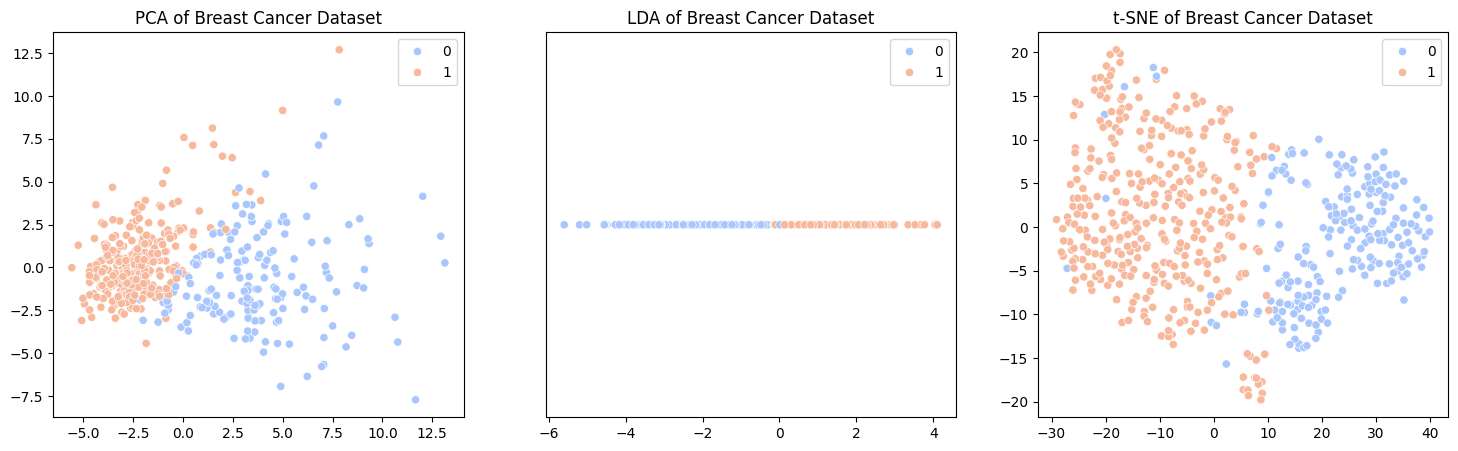

Original Data Accuracy: 98.25%
PCA Data Accuracy: 94.74%
LDA Data Accuracy: 97.37%
PCA Silhouette Score: 0.52
LDA Malignant Mean: -2.46
LDA Benign Mean: 1.47
LDA Mean Difference: 3.93


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans

# Load the Breast Cancer Wisconsin (Diagnostic) Dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply PCA (Reduce to 2 Components for Visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply LDA (Reduce to 1 Component for Class Separation)
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Apply t-SNE (For Visualization Only)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 📊 Visual Inspection - PCA & LDA Scatter Plots**
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA Plot
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', ax=axes[0])
axes[0].set_title('PCA of Breast Cancer Dataset')

# LDA Plot (LDA is 1D, so we spread points along y-axis for visibility)
sns.scatterplot(x=X_train_lda[:, 0], y=[0] * len(X_train_lda), hue=y_train, palette='coolwarm', ax=axes[1])
axes[1].set_title('LDA of Breast Cancer Dataset')
axes[1].set_yticks([])  # Hide y-axis as LDA is 1D

# t-SNE Plot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', ax=axes[2])
axes[2].set_title('t-SNE of Breast Cancer Dataset')

plt.show()

# Classification Accuracy (Logistic Regression on Reduced Data)**
def evaluate_model(X_train, X_test, y_train, y_test, method_name):
    model = LogisticRegression(max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{method_name} Accuracy: {accuracy:.2%}")

# Original Data
evaluate_model(X_train, X_test, y_train, y_test, "Original Data")

# PCA Data
evaluate_model(X_train_pca, X_test_pca, y_train, y_test, "PCA Data")

# LDA Data
evaluate_model(X_train_lda, X_test_lda, y_train, y_test, "LDA Data")

# Apply K-Means clustering to PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_pca)  # Generate cluster labels

# Compute Silhouette Score using cluster labels from K-Means
score_pca = silhouette_score(X_train_pca, cluster_labels)
print(f"PCA Silhouette Score: {score_pca:.2f}")

# Mean Difference for LDA (Measures How Well LDA Separates Classes in 1D)
lda_malignant_mean = np.mean(X_train_lda[y_train == 0])
lda_benign_mean = np.mean(X_train_lda[y_train == 1])
mean_difference = abs(lda_benign_mean - lda_malignant_mean)

print(f"LDA Malignant Mean: {lda_malignant_mean:.2f}")
print(f"LDA Benign Mean: {lda_benign_mean:.2f}")
print(f"LDA Mean Difference: {mean_difference:.2f}")



The results highlight how well PCA and LDA perform in classification and class separation. The original dataset achieved the highest accuracy (98.25%), as expected. PCA (94.74%) led to some information loss, while LDA (97.37%) retained most of the class separation, performing nearly as well as the full dataset.

The PCA Silhouette Score (0.52) indicates moderate class separability—PCA preserves variance but does not explicitly group classes. In contrast, LDA maximizes class separation, as shown by the LDA mean difference (3.93), where malignant samples cluster around -2.46 and benign samples around 1.47. Since the means are far apart, LDA successfully separates the two classes, making classification easier.

Conclusion: LDA is better for classification, while PCA is better for dimensionality reduction and visualization.

# UMAP: Uniform Manifold Approximation and Projection

UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique that preserves both local and global structure of high-dimensional data. It is often used as an alternative to t-SNE due to its faster computation and better scalability.

## Key Features of UMAP
- Preserves local and global data structure better than t-SNE.
- Works efficiently on large datasets.
- Useful for visualizing high-dimensional data in a low-dimensional space.



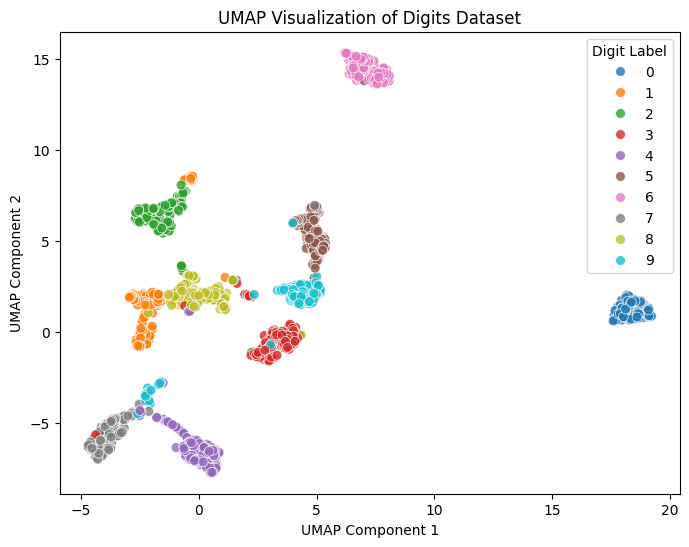

In [ ]:
import warnings

# Suppressing FutureWarnings related to 'force_all_finite' deprecation in scikit-learn
warnings.filterwarnings(
    "ignore",
    message=".*'force_all_finite' was renamed to 'ensure_all_finite' in 1.6.*",
    category=FutureWarning
)

import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Digits dataset
data = load_digits()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to float64 to avoid warnings
X_scaled = np.array(X_scaled, dtype=np.float64)

# Apply UMAP for dimensionality reduction with updated parameters
umap_model = umap.UMAP(n_components=2, random_state=None, n_jobs=-1)
X_umap = umap_model.fit_transform(X_scaled)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=50, alpha=0.8)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Visualization of Digits Dataset')
plt.legend(title='Digit Label')
plt.show()

### Why Are We Suppressing This Warning?
Scikit-learn **1.6** introduced a change where `force_all_finite` was renamed to `ensure_all_finite`. This change will become permanent in **scikit-learn 1.8**, and `force_all_finite` will be removed. Some third-party libraries (like UMAP) may still be using the old parameter internally, which triggers the following **FutureWarning**:

```
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
```

Even though our code does not explicitly use `force_all_finite`, third-party dependencies may invoke it internally, leading to this warning. Since we cannot modify the internal code of these libraries, we use `warnings.filterwarnings` to suppress this message while keeping everything functional. Future updates to UMAP and scikit-learn should eventually resolve this issue.

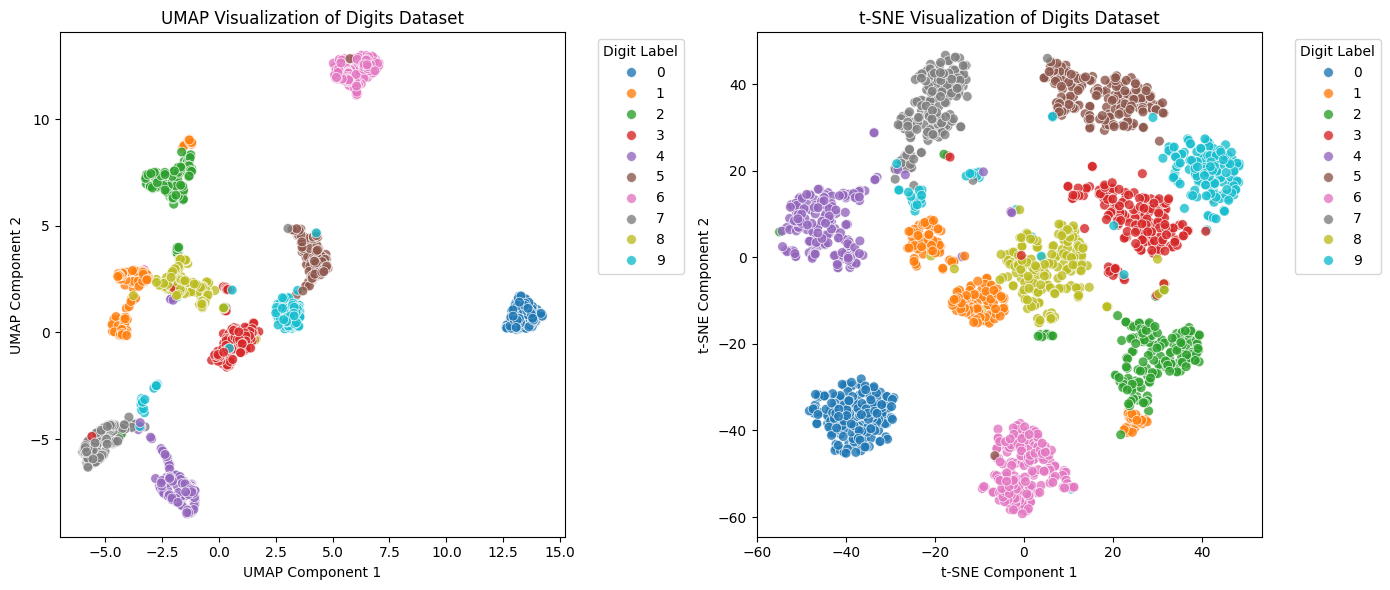

In [ ]:
import warnings

# Suppressing FutureWarnings related to 'force_all_finite' deprecation in scikit-learn
warnings.filterwarnings(
    "ignore",
    message=".*'force_all_finite' was renamed to 'ensure_all_finite' in 1.6.*",
    category=FutureWarning
)

import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.manifold import TSNE

# Load the Digits dataset
data = load_digits()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to float64 to avoid warnings
X_scaled = np.array(X_scaled, dtype=np.float64)

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=None, n_jobs=-1)
X_umap = umap_model.fit_transform(X_scaled)

# Apply t-SNE for dimensionality reduction
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_model.fit_transform(X_scaled)

# Plot the UMAP and t-SNE results side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# UMAP Plot
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=50, alpha=0.8, ax=ax[0])
ax[0].set_xlabel('UMAP Component 1')
ax[0].set_ylabel('UMAP Component 2')
ax[0].set_title('UMAP Visualization of Digits Dataset')
ax[0].legend(title='Digit Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# t-SNE Plot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', s=50, alpha=0.8, ax=ax[1])
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')
ax[1].set_title('t-SNE Visualization of Digits Dataset')
ax[1].legend(title='Digit Label', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In our visualization comparing UMAP and t-SNE on the Digits dataset, we observe key differences in interpretability between the two methods. UMAP preserves both local and global structures better, resulting in clear, well-separated clusters that maintain meaningful distances relative to each other. In contrast, t-SNE tends to distort the global structure, making it harder to interpret relationships between clusters, as seen in the visualization where some groups are artificially pushed closer or farther apart. Additionally, UMAP is more stable, producing consistent layouts across multiple runs, whereas t-SNE can yield different cluster arrangements each time it is executed. This makes UMAP more interpretable, as the structure remains reliable. Moreover, UMAP is computationally more efficient, scaling better for larger datasets, while t-SNE becomes slower and may struggle with cluster cohesion. While t-SNE can be useful for emphasizing local structures, as seen in its tighter clusters, UMAP provides a more balanced representation that retains both fine-grained details and an overall meaningful structure. Given these advantages, UMAP offers a clearer, more interpretable low-dimensional projection, making it a better choice for understanding high-dimensional data in many cases.

## Comparison of UMAP vs. t-SNE
| Feature         | UMAP | t-SNE |
|---------------|------|------|
| Speed        | Faster | Slower |
| Structure Preservation | Global + Local | Mostly Local |
| Interpretability | High | Moderate |
| Handles Large Data | Yes | No |

## When to Use UMAP?
- When you need **faster** dimensionality reduction compared to t-SNE.
- When preserving both **global and local structures** is important.
- When working with **large datasets** where t-SNE may be computationally expensive.

This section introduces UMAP as an alternative to t-SNE and demonstrates its application for visualizing high-dimensional data.